Epoch 0 Loss 0.502147
Epoch 1000 Loss 0.262809
Epoch 2000 Loss 0.089903
Epoch 3000 Loss 0.060723
Epoch 4000 Loss 0.048154
Epoch 5000 Loss 0.040888
Epoch 6000 Loss 0.036050
Epoch 7000 Loss 0.032546
Epoch 8000 Loss 0.029866
Epoch 9000 Loss 0.027734

Predictions:
Input: [0 0] -> Output: 0.0172, Expected: 0
Input: [0 1] -> Output: 0.9728, Expected: 1
Input: [1 0] -> Output: 0.9735, Expected: 1
Input: [1 1] -> Output: 0.0330, Expected: 0


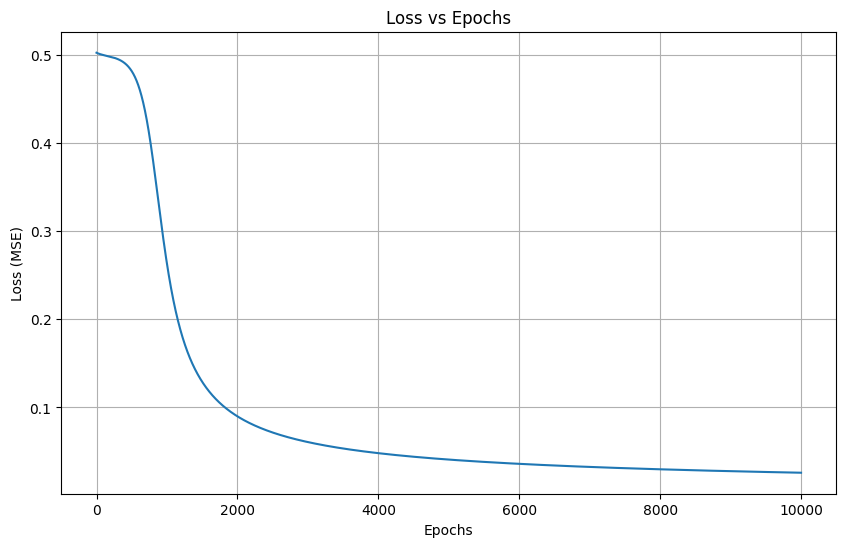

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


# XOR input and expected output
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

# Hyperparameters
epochs = 10000
lr = 0.2
inputN,hiddenN,outputN = 2,4,1

# Initialize weights with better scaling for proper convergence
hiddenW = np.random.randn(inputN,hiddenN) * np.sqrt(1.0/inputN)
hiddenB = np.zeros((1,hiddenN))
outputW = np.random.randn(hiddenN,outputN) * np.sqrt(1.0/hiddenN)
outputB = np.zeros((1,outputN))

# Store loss history for plotting
losses = []

# Training loop
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_activation = np.dot(inputs, hiddenW) + hiddenB
    hidden_layer_output = sigmoid(hidden_layer_activation)
    
    output_layer_activation = np.dot(hidden_layer_output, outputW) + outputB
    predicted_output = sigmoid(output_layer_activation)
    
    # Calculate error
    error = expected_output - predicted_output
    
    # Backpropagation
    # Output layer error
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    # Hidden layer error
    error_hidden_layer = d_predicted_output.dot(outputW.T) * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    outputW += lr * hidden_layer_output.T.dot(d_predicted_output)  # Note: Changed sign to += for proper gradient ascent
    outputB += lr * np.sum(d_predicted_output, axis=0, keepdims=True)
    
    hiddenW += lr * inputs.T.dot(error_hidden_layer)  # Note: Changed sign to += for proper gradient ascent
    hiddenB += lr * np.sum(error_hidden_layer, axis=0, keepdims=True)
    
    # Calculate and store loss
    loss = np.mean(np.abs(error))  # Using MSE loss
    losses.append(loss)
    
    # Print progress
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} Loss {loss:.6f}")


# Print predictions
print("\nPredictions:")
for i in range(len(inputs)):
    print(f"Input: {inputs[i]} -> Output: {predicted_output[i][0]:.4f}, Expected: {expected_output[i][0]}")

# Plot loss over time
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

# I'm using gradient descent with a negative error formulation
# If error = expected_output - predicted_output, then we use +=
# If error = predicted_output - expected_output, then we would use -=

